In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
url='https://raw.githubusercontent.com/yakushinav/omo/main/data/sap_stock.csv'
data=pd.read_csv(url,index_col='Date')
data.index = pd.to_datetime(data.index)
print(data.head())

             Open   High    Low  Close  Change  Traded Volume     Turnover  \
Date                                                                         
2009-03-09  25.16  25.82  24.48  25.59     NaN      5749357.0  145200289.0   
2009-03-10  25.68  26.95  25.68  26.87     NaN      7507770.0  198480965.0   
2009-03-11  26.50  26.95  26.26  26.64     NaN      5855095.0  155815439.0   
2009-03-12  26.15  26.47  25.82  26.18     NaN      6294955.0  164489409.0   
2009-03-13  26.01  26.24  25.65  25.73     NaN      6814568.0  176228331.0   

            Last Price of the Day  Daily Traded Units  Daily Turnover  
Date                                                                   
2009-03-09                    NaN                 NaN             NaN  
2009-03-10                    NaN                 NaN             NaN  
2009-03-11                    NaN                 NaN             NaN  
2009-03-12                    NaN                 NaN             NaN  
2009-03-13           

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2550 entries, 2009-03-09 to 2019-03-08
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Open                   2242 non-null   float64
 1   High                   2543 non-null   float64
 2   Low                    2543 non-null   float64
 3   Close                  2550 non-null   float64
 4   Change                 11 non-null     float64
 5   Traded Volume          2504 non-null   float64
 6   Turnover               2497 non-null   float64
 7   Last Price of the Day  0 non-null      float64
 8   Daily Traded Units     0 non-null      float64
 9   Daily Turnover         7 non-null      float64
dtypes: float64(10)
memory usage: 219.1 KB


In [4]:
data.describe()

,Open,High,Low,Close,Change,Traded Volume,Turnover,Last Price of the Day,Daily Traded Units,Daily Turnover
count,2242.000000,2543.000000,2543.000000,2550.000000,11.000000,2.504000e+03,2.497000e+03,0.0,0.0,7.0
mean,56.686896,61.563225,60.535073,60.995955,-0.070000,3.296818e+06,1.828440e+08,NaN,NaN,0.0
std,18.320821,21.184135,20.934460,21.097480,0.709761,2.004323e+06,9.350710e+07,NaN,NaN,0.0
min,25.160000,25.820000,24.480000,25.590000,-0.740000,0.000000e+00,1.767350e+05,NaN,NaN,0.0
25%,41.500000,43.430000,42.590000,42.950000,-0.500000,2.131686e+06,1.300462e+08,NaN,NaN,0.0
50%,56.560000,58.480000,57.580000,58.015000,-0.290000,2.852772e+06,1.626544e+08,NaN,NaN,0.0
75%,67.732500,78.365000,77.085000,77.762500,0.085000,3.878528e+06,2.104511e+08,NaN,NaN,0.0
max,100.100000,108.520000,107.020000,107.800000,1.250000,3.645671e+07,1.369431e+09,NaN,NaN,0.0


In [5]:
df = pd.DataFrame(data, columns=['Close'])
df = df.reset_index()

print(df.isna().values.any())
print(df.head())

False
        Date  Close
0 2009-03-09  25.59
1 2009-03-10  26.87
2 2009-03-11  26.64
3 2009-03-12  26.18
4 2009-03-13  25.73


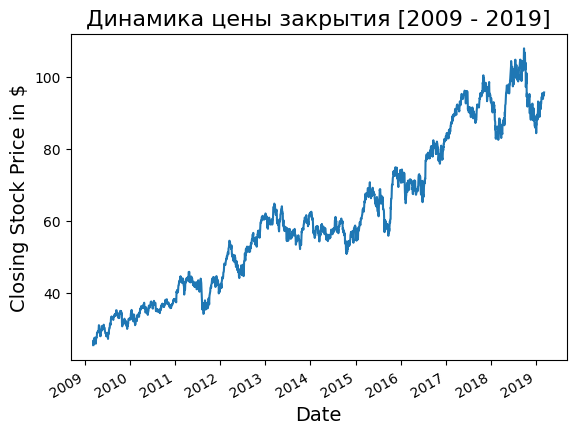

In [6]:
import matplotlib.dates as mdates

years = mdates.YearLocator()
yearsFmt = mdates.DateFormatter('%Y')

fig, ax = plt.subplots()

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

ax.plot(df['Date'], df['Close'])

plt.title('Динамика цены закрытия [2009 - 2019]', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Closing Stock Price in $', fontsize=14)
fig.autofmt_xdate()

plt.show()

In [7]:
train, test = train_test_split(df, test_size=0.20)

In [8]:
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Close']

model = LinearRegression()
model.fit(X_train, y_train)

print(model.coef_, model.intercept_)

[0.02760525] 25.81270826339494


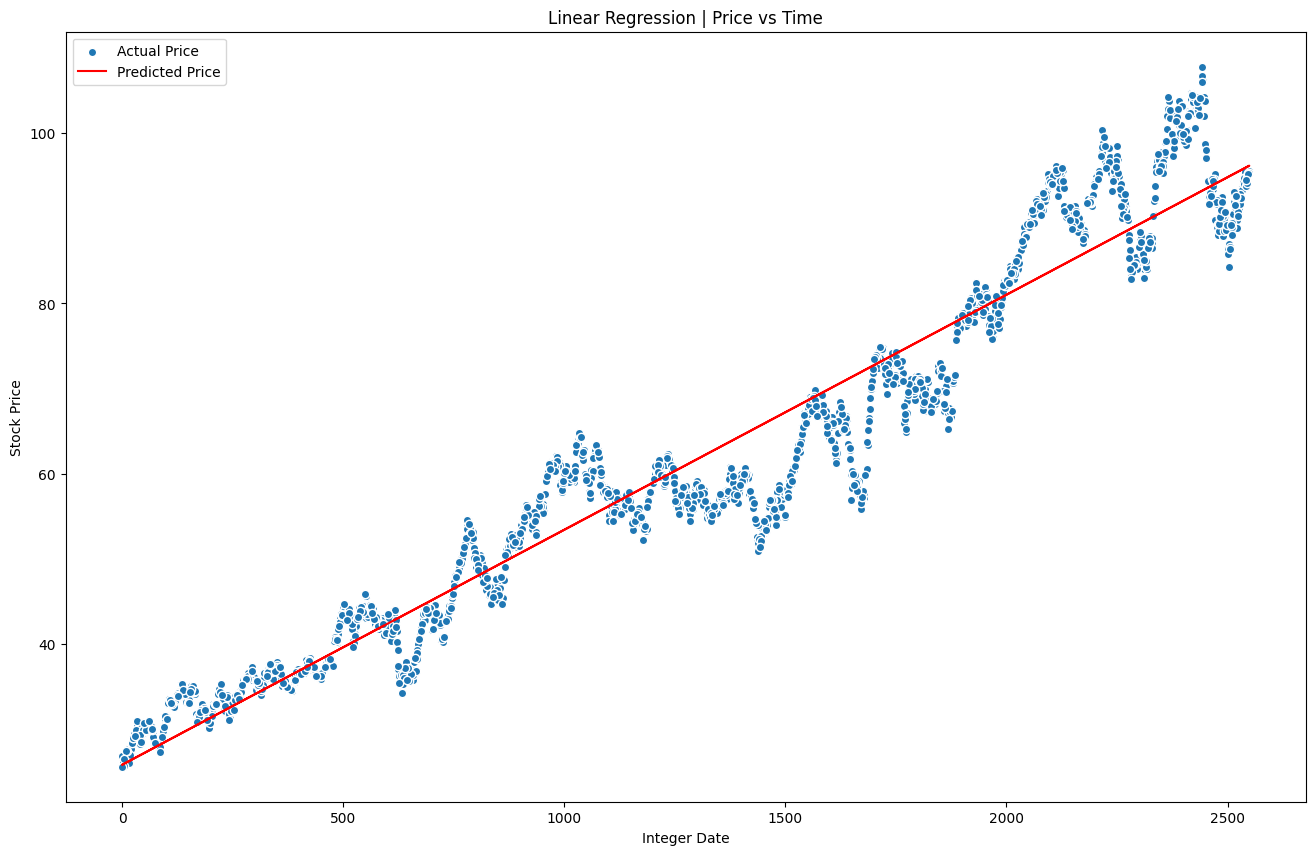

In [9]:
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [10]:
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Close']

y_pred = model.predict(X_test)
test['Prediction']=y_pred

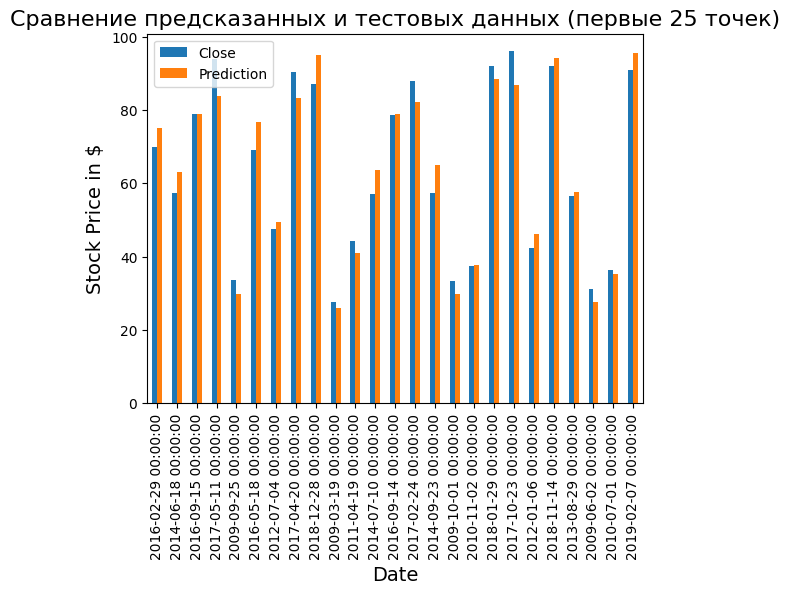

In [11]:
fig, ax = plt.subplots()
test[0:25].plot(x='Date', y=['Close', 'Prediction'], kind='bar', ax=ax)

plt.title('Сравнение предсказанных и тестовых данных (первые 25 точек)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Stock Price in $', fontsize=14)
plt.show()

In [12]:
df['Prediction'] = model.predict(np.array(df.index).reshape(-1, 1))
print(df.head())

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2: ', metrics.r2_score(y_test, y_pred))
print(explained_variance_score(y_test, y_pred))

        Date  Close  Prediction
0 2009-03-09  25.59   25.812708
1 2009-03-10  26.87   25.840314
2 2009-03-11  26.64   25.867919
3 2009-03-12  26.18   25.895524
4 2009-03-13  25.73   25.923129
Mean Absolute Error: 4.591513269453838
Mean Squared Error: 32.44605906312166
Root Mean Squared Error: 5.696144227731743
R2:  0.9292096659824435
0.929209672633388


In [13]:
df = pd.DataFrame(data, columns=['Open','High','Low','Close'])

print(df.isna().values.any())
df=df.dropna()
print(df.isna().values.any())

True
False


In [14]:
train, test = train_test_split(df, test_size=0.20)

X=train[['Open','High','Low']] 
y=train['Close']

lm = LinearRegression()
lm.fit(X, y)

X_test=test[['Open','High','Low']] 
y_test=test['Close']

y_pred=lm.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2: ', metrics.r2_score(y_test, y_pred))
print(explained_variance_score(y_test, y_pred))

Mean Absolute Error: 0.21210439908740308
Mean Squared Error: 0.07857454929730999
Root Mean Squared Error: 0.2803115218775532
R2:  0.999759750926157
0.9997598413120555
